In [ ]:
"""
Example of computing text box size and relative position of word in box

Create figures used in project description
"""

import random
import collections
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# Set plot range and figure size
PLOT_RANGE = [-1, 1]
FIG_SIZE = 8
SHOW = True

In [3]:
def init_plot():
    """
    Ouput/action: Initialize plot in matplotlib and return figure/axis tuple
    """
    
    fig, axs = plt.subplots()
    fig.set_figheight(FIG_SIZE)
    fig.set_figwidth(FIG_SIZE)
    axs.set_xlim(PLOT_RANGE)
    axs.set_ylim(PLOT_RANGE)
    return fig, axs

In [4]:
#############################################################################
# Use matplotlib to compute bounding boxes for plotted words


def compute_box_info(box, word_pos, axs):
    """
    Input: matplotlib textbox box, tuple of floats word_pos, matplotlib Axes axs
    box:
    box 是 matplotlib.text.Text 对象，即 axs.text(...) 的返回值。axs.text(...) 方法用于在指定的 matplotlib 轴 (axs) 上绘制文本，返回一个 Text 实例，它表示该文本对象，并包含其属性，如位置、字体大小、颜色等。
    word_pos:
    字体位置
    axs: 用于将data coordinate 转为 pixel
    
    Output: Tuple (box_size, word_offset) consisting of box size and offset from lower left of box to
    lower left of word
    
    NOTE: Textbox must have been rendered prior to this call
    """
        
    rendered_box = box.get_window_extent()   
    '''
    get_window_extent() 方法用于获取该文本对象在 显示坐标系（screen coordinates / display coordinates） 下的边界框。
    '''
    # Return box in display coordinates
    fig_min = (rendered_box.xmin, rendered_box.ymin)
    fig_max = (rendered_box.xmax, rendered_box.ymax) 
    '''
    rendered_box.xmin 和 rendered_box.ymin 是 Bbox 物件的左下角坐标（bounding box lower-left corner）
    rendered_box.xmax 和 rendered_box.ymax 是 Bbox 物件的右上角坐标（bounding box upper-right corner）
    fig_min = (xmin, ymin) = 文本框左下角的像素坐标 Plot
	fig_max = (xmax, ymax) = 文本框右上角的像素坐标 Plot
    '''
    box_min = axs.transData.inverted().transform(fig_min)   # Convert to data coordinates
    box_max = axs.transData.inverted().transform(fig_max)   # Convert to data coordinates 
    '''
    axs.transData.inverted().transform(...) 的作用是 将屏幕坐标转换回数据坐标（即 matplotlib 轴坐标系）
    '''
    box_size = ((box_max[0] - box_min[0]), (box_max[1] - box_min[1])) # box_size = (宽度, 高度)
    word_offset = (word_pos[0] - box_min[0], word_pos[1] - box_min[1]) # 计算 单词的起始位置相对于文本框左下角的偏移量
    return box_size, word_offset

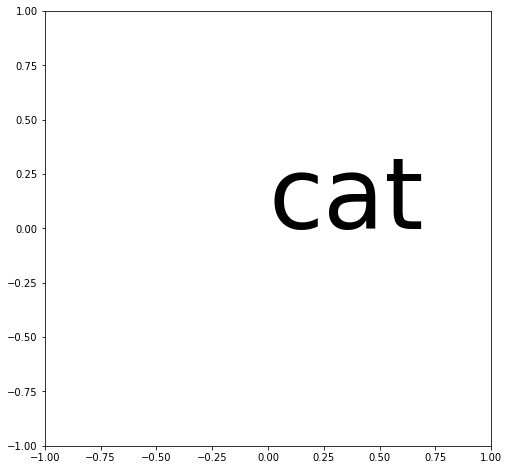

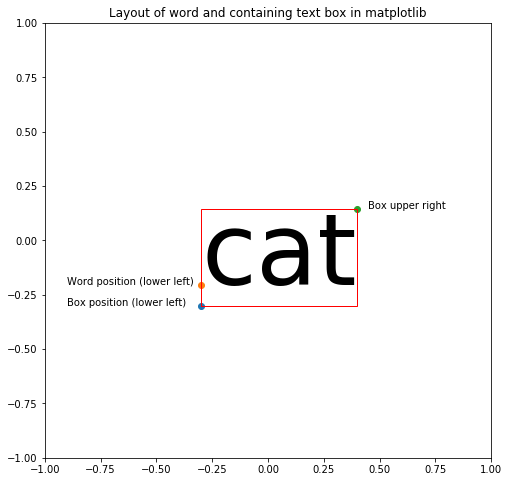

In [5]:
def test_compute_box_info(word, fontsize, box_pos):
    """
    Input: string word, integer fontsize, tuple box_pos
    
    Action: Plot word as text using specified fontsize and position
    both built-in and manually computed bounding boxes should be drawn
    """
    fig, axs = init_plot()

    # Plot word with lower left at origin, save bounding box object
    box = axs.text(0.0, 0.0, word, fontsize=fontsize)
    '''
    box 是 matplotlib.text.Text 对象，即 axs.text(...) 的返回值。axs.text(...) 方法用于在指定的 matplotlib 轴 (axs) 上绘制文本，返回一个 Text 实例，它表示该文本对象，并包含其属性，如位置、字体大小、颜色等。
    这里 box 存储了文本对象 "cat" 的所有信息，如它在图上的位置、字体大小、文本框属性等。
    这里的 (0.0, 0.0) 代表 数据坐标系 中的位置，意味着 文本的左下角被放置在数据坐标 (0,0) 处
    '''
    plt.show()   
    #plt.savefig("junk.png", dpi=fig.dpi)
    plt.close()
    
    # Compute information about rendered textbox based on box_pos
    box_size, word_offset = compute_box_info(box, (0.0, 0.0), axs)
    '''
    这里 (0.0, 0.0) 也是数据坐标，表示 单词的起始位置 在 数据坐标 下的 (0,0)
    '''
    word_pos = (box_pos[0] + word_offset[0], box_pos[1] + word_offset[1])
    box_upperright = (box_pos[0] + box_size[0], box_pos[1] + box_size[1])

    # Plot word at specified [position with bounding box
    fig, axs = init_plot()
    axs.text(word_pos[0], word_pos[1], word,
             fontsize=fontsize, bbox=dict(facecolor='none', edgecolor='red', pad=0.0))
    
    # Add points for word and box positions as well as box upper right
    axs.scatter(box_pos[0], box_pos[1])
    axs.scatter(word_pos[0], word_pos[1])
    axs.scatter(box_upperright[0], box_upperright[1])
    
    # Annotate points
    axs.annotate("Box position (lower left)", box_pos, xytext=(box_pos[0] - 0.6, box_pos[1]))
    axs.annotate("Word position (lower left)", word_pos, xytext=(word_pos[0] - 0.6, word_pos[1]))
    axs.annotate("Box upper right", box_upperright, xytext=(box_upperright[0] + 0.05, box_upperright[1]))
    
    axs.set_title("Layout of word and containing text box in matplotlib")
    #plt.savefig("text_box_layout.png")
    plt.show()
    return

  
test_compute_box_info("cat", 100, (-0.3, -0.3))
'''
-.03 -0.3 是box_pos
'''